trace_num    :  60000
trace_length :  700


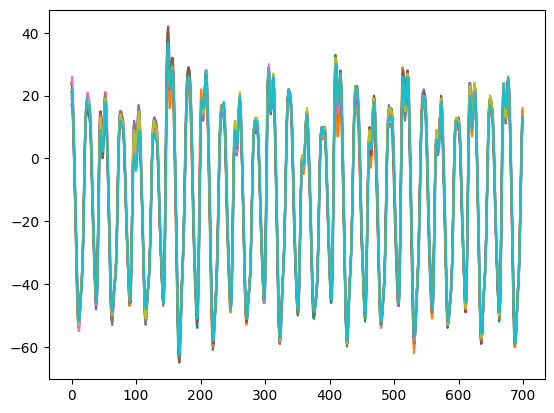

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import chipwhisperer as cw
import chipwhisperer.analyzer as cwa
import cw_ml_plugin.analyzer as cwma

project = cw.open_project("path_to_ASCAD.cwp")
print("trace_num    : ", len(project.traces))
print("trace_length : ", len(project.waves[0]))
for i in range(10):
    plt.plot(project.waves[i])
plt.show()

In [ ]:
attack = cwma.attacks.DDLA(project, 
              cwa.leakage_models.sbox_output, 
              epoch=50, 
              batch_size=1000,
              label_func= cwma.attacks.LSB
              )
attack.trace_range = [0, 20000]
bnum = 2
attack.byte_range = [bnum]
attack.key_range = range(224-10, 224+10)
attack.max_parallel_jobs = 4

cb = cwa.get_jupyter_callback(attack)

In [ ]:
attack_result = attack.run(cb)

Calculating Hypothesis Values


100%|██████████| 256/256 [00:06<00:00, 42.01it/s]

Trainig the model with 20000 traces on devive cuda
CAUTION: the estimated time on the progress bar is not accurate



Attacking byte_range [2], key_range range(0, 256):  95%|█████████▌| 244/256 [16:19<00:31,  2.64s/it]

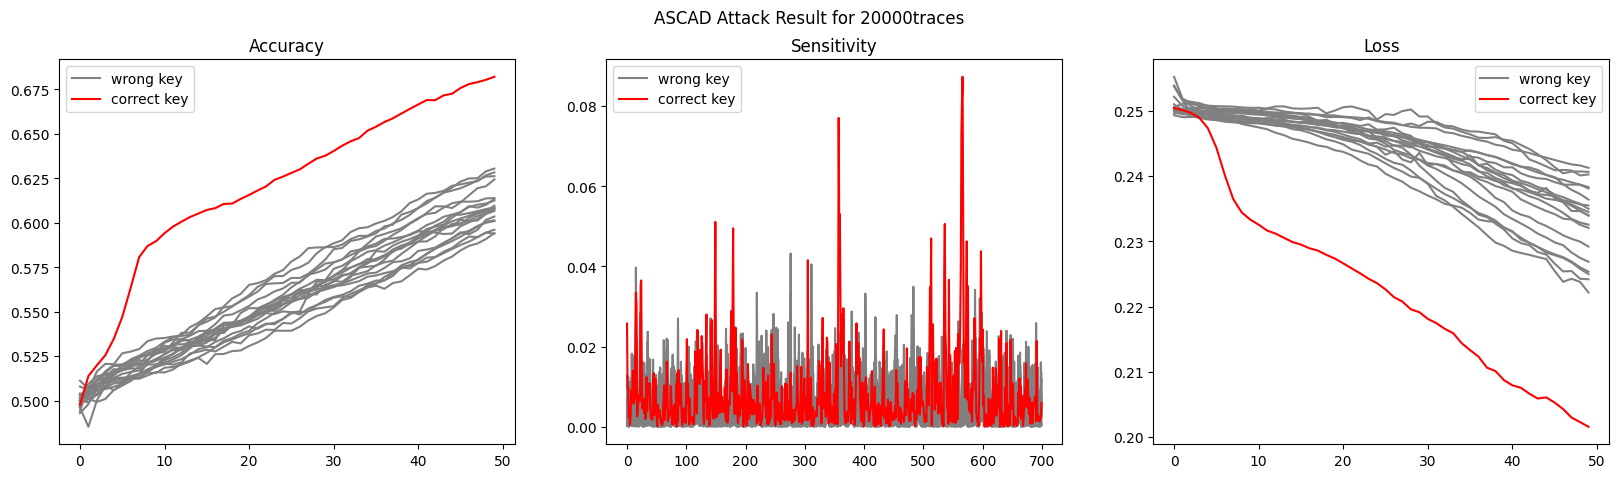

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle(f"ASCAD Attack Result for {attack.trace_range[1]-attack.trace_range[0]}traces") # type: ignore
axs[0].set_title("Accuracy") # type: ignore
axs[2].set_title("Loss") # type: ignore
axs[1].set_title("Sensitivity") # type: ignore

correct_key = project.traces[0].key[2] # type: ignore
num = 0
for key in attack.key_range: # type: ignore
    if key != correct_key and num == 0:
        axs[0].plot(attack_result.accuracy[bnum][key], color = 'gray', label = 'wrong key') # type: ignore
        axs[2].plot(attack_result.loss[bnum][key], color = 'gray', label = 'wrong key') # type: ignore
        axs[1].plot(attack_result.metrics[bnum][key], color = 'gray', label = 'wrong key') # type: ignore
    elif key != correct_key: 
        axs[0].plot(attack_result.accuracy[bnum][key], color = 'gray') # type: ignore
        axs[2].plot(attack_result.loss[bnum][key], color = 'gray') # type: ignore
        axs[1].plot(attack_result.metrics[bnum][key], color = 'gray') # type: ignore
    num += 1
        
axs[0].plot(attack_result.accuracy[bnum][correct_key], color = 'red', label = 'correct key') # type: ignore
axs[2].plot(attack_result.loss[bnum][correct_key], color = 'red', label = 'correct key') # type: ignore
axs[1].plot(attack_result.metrics[bnum][correct_key], color = 'red', label = 'correct key') # type: ignore
axs[0].legend()
axs[2].legend()
axs[1].legend()